In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error
import math

# scikit-learn

## SVM

In [10]:
from sklearn.svm import SVC, LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [152]:
#iris = datasets.load_iris()
#X = iris['data'][:, 2:]
#y = (iris['target'] == 2).astype(np.float32)

#sc = StandardScaler()  # метод чувствителен к масштабированию
#svm_c = LinearSVC()

#X = sc.fit_transform (X)
#svm_c.fit(X,y)


LinearSVC()

In [183]:
#svm_c.predict([[5.5, 1.7]])

In [184]:
#svm_c.score(X,y)

In [143]:
# Рисовательная функция
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

(-2.0, 2.0, -2.0, 2.0)

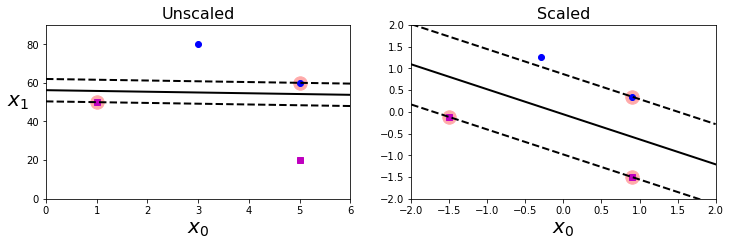

In [145]:
# Иллюстрация чувствительности к масштабу
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])



In [156]:
from sklearn.pipeline import Pipeline

In [187]:
df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

In [188]:
df['International plan'] = df['International plan'].map({'No':0, 'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0, 'Yes':1})
X = df.drop(['State', 'Churn'], axis = 1)
Y = df['Churn']

test_df['International plan'] = test_df['International plan'].map({'No':0, 'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0, 'Yes':1})
X_test = test_df.drop(['State', 'Churn'], axis = 1)
Y_test = test_df['Churn']


In [209]:
# в одном списке передаем два кортежа('scaler' и 'svc',где SVC это классификатор- с полимеальным ядром,степень ядра 3 и C)
#pipe_svc = Pipeline ([('scaler', StandardScaler() ), 
#                     ('svc', SVC(kernel = 'poly', degree = 3, C = 10))])

In [210]:
#pipe_svc.fit(X,Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, kernel='poly'))])

In [211]:
#pipe_svc.score(X_test,Y_test)

In [ ]:
# запись без пайплайна

# sickit-learn

## KNN

In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [3]:
df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

In [4]:
df['International plan'] = df['International plan'].map({'No':0, 'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0, 'Yes':1})
X = df.drop(['State', 'Churn'], axis = 1)
Y = df['Churn']

test_df['International plan'] = test_df['International plan'].map({'No':0, 'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0, 'Yes':1})
X_test = test_df.drop(['State', 'Churn'], axis = 1)
Y_test = test_df['Churn']


In [13]:
sc = StandardScaler()

In [14]:
sc.fit(X)

StandardScaler()

In [15]:
X = sc.transform(X)
X_test = sc.transform(X_test)

In [16]:
knn_clf.fit(X, Y) 

KNeighborsClassifier()

In [6]:
knn_clf.score(X, Y), knn_clf.score(X_test, Y_test)

(0.8912228057014253, 0.8860569715142429)

In [17]:
knn_clf.score(X, Y), knn_clf.score(X_test, Y_test)

(0.921980495123781, 0.896551724137931)

In [ ]:
# Что в данном примере сделано не правильно?

### Cross - Validation

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')
df['International plan'] = df['International plan'].map({'No':0, 'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0, 'Yes':1})
X = df.drop(['State', 'Churn'], axis = 1)
Y = df['Churn']

test_df['International plan'] = test_df['International plan'].map({'No':0, 'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0, 'Yes':1})
X_test = test_df.drop(['State', 'Churn'], axis = 1)
Y_test = test_df['Churn']


In [20]:
clf = DecisionTreeClassifier(random_state = 42)

In [21]:
clf.fit(X,Y)

DecisionTreeClassifier(random_state=42)

In [22]:
clf.score(X_test,Y_test)

0.9130434782608695

In [24]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [25]:
#передаем наш классификатор обученный, и наше множество,на котором учим.cv - то сколько разбиений мы хотим делать
# scoring='roc_auc'
score = cross_val_score(clf, X, Y, cv=5, scoring='roc_auc') #scoring='roc_auc'

In [26]:
# получили 5 оценок из множества X, Y
score

array([0.9082397 , 0.89681051, 0.89868668, 0.90243902, 0.9043152 ])

In [27]:
score.mean()

0.9020982215007975

In [67]:
# cross_val_predict(clf,X,Y)

In [ ]:
# Поиск гиперпараметров 

In [28]:
from sklearn.model_selection import GridSearchCV

In [69]:
# проведем настройку гиперпараметров для дерева и ближайших соседей

In [30]:
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

tree.fit(X, Y)
knn.fit(X, Y)

KNeighborsClassifier()

In [128]:
# Оценим точность

In [31]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

In [32]:
tree_pred = tree.predict(X_test)
roc_auc_score (Y_test, tree_pred), accuracy_score (Y_test, tree_pred)


(0.83605999263894, 0.9145427286356822)

In [33]:
knn_pred = knn.predict(X_test)
roc_auc_score (Y_test, knn_pred), accuracy_score (Y_test, knn_pred)
# accuracy_score - оцениваем точность попадания в класс
# roc_auc_score - оцениваем площать под кривой

(0.6526683842473318, 0.8860569715142429)

In [34]:
# поиск для дерева
# формируем словарь
tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

In [35]:
tree_grid = GridSearchCV(tree, tree_params,cv=5, verbose=True, )# scoring='roc_auc'

In [36]:
tree_grid.fit(X, Y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [37]:
tree_grid.best_params_

{'max_depth': 7, 'max_features': 18}

In [38]:
tree_grid.best_score_

0.9373583208606503

In [39]:
pred = tree_grid.predict(X_test)

In [40]:
roc_auc_score(Y_test, pred), accuracy_score(Y_test, pred)

(0.8614464482885535, 0.9430284857571214)

In [ ]:
# поиск для соседей

In [41]:
df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')
df['International plan'] = df['International plan'].map({'No':0, 'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0, 'Yes':1})
X = df.drop(['State', 'Churn'], axis = 1)
Y = df['Churn']

test_df['International plan'] = test_df['International plan'].map({'No':0, 'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0, 'Yes':1})
X_test = test_df.drop(['State', 'Churn'], axis = 1)
Y_test = test_df['Churn']

In [46]:
sc.fit(X)
X = sc.transform(X)
X_test = sc.transform(X_test)

In [47]:
knn_params= {'n_neighbors':range(1,11)}

In [48]:
knn_grid = GridSearchCV(knn, knr_params,cv=5, verbose=True, )

In [49]:
knn_grid.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, verbose=True)

In [51]:
knn_grid.score(X,Y)

0.9351087771942985

In [52]:
pre = knn_grid.predict(X_test)

In [53]:
roc_auc_score(Y_test, pre), accuracy_score(Y_test, pre)

(0.6895104895104895, 0.896551724137931)